# Multilayer Perceptron Classification

we'll bulid a Classification model that's able to detect spine abnormalities

dataset : https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
spine_df= pd.read_csv('datasets/spine_data.csv',
                        skiprows=1,
                        names=[
                            'pelvic_incidence',
                            'pelvic_tilt',
                            'lumbar_lordosis_angle',
                            'sacral_slope',
                            'pelvic_radius',
                            'degree_spondylolisthesis',
                            'pelvic_slope',
                            'Direct_tilt',
                            'thoracic_slope',
                            'cervical_tilt',
                            'sacrum_angle',
                            'scoliosis_slope',
                            'class'
                        ])

In [3]:
spine_df= spine_df.sample(frac=1).reset_index(drop=True)

## Exploring and Preparing our dataset for Classification

In [4]:
spine_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,0.581169,12.0774,16.6255,7.20496,-31.374823,29.5748,Normal
1,48.332638,22.227784,36.181993,26.104854,117.384625,6.481709,0.062277,23.5538,11.0942,13.15072,-4.200276,20.0348,Abnormal
2,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731,0.040764,16.7193,15.9657,8.19480,-33.380627,30.2644,Normal
3,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,0.972006,10.5715,11.2339,13.29506,-12.139219,11.8487,Abnormal
4,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,0.003220,13.3594,18.2659,15.38281,-2.504431,14.2555,Abnormal


In [5]:
spine_df.shape

(310, 13)

In [6]:
spine_df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [7]:
spine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [8]:
from sklearn import preprocessing

label_encoding= preprocessing.LabelEncoder()

spine_df['class']= label_encoding.fit_transform(spine_df['class']).astype(int)

In [9]:
spine_df.sample(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
185,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,0.793169,19.5456,8.7779,16.40308,-35.287375,31.6243,0
222,63.959522,16.060945,63.123736,47.898577,142.360125,6.298971,0.134954,31.7659,10.9570,13.32169,-9.939014,31.3141,1
93,85.095503,21.069897,91.734792,64.025606,109.062312,38.032831,0.481862,17.1681,8.4727,11.98150,-25.387556,8.3163,0


<Axes: >

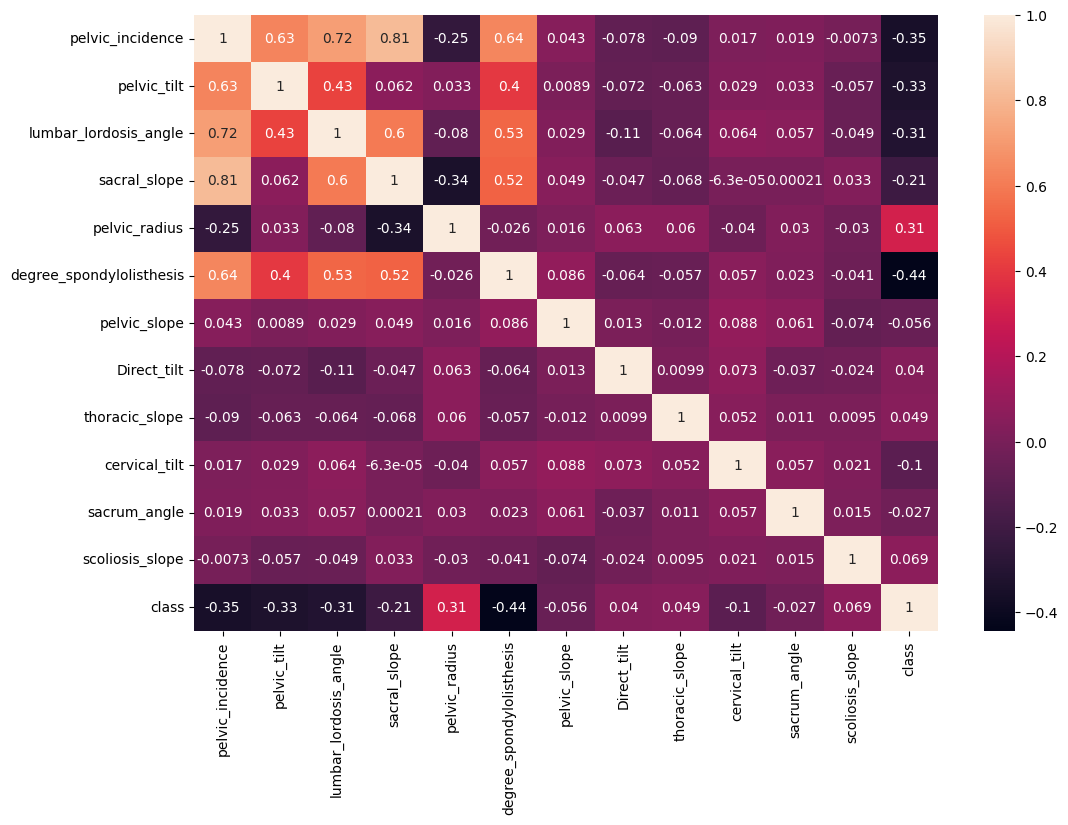

In [11]:
spine_corr= spine_df.corr()
fig, ax= plt.subplots(figsize=(12,8))

sns.heatmap(spine_corr,annot=True)

In [12]:
from sklearn.model_selection import train_test_split

X= spine_df.drop('class',axis=1)
Y= spine_df['class']

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

In [13]:
x_train.shape, y_train.shape

((248, 12), (248,))

In [14]:
x_test.shape , y_test.shape

((62, 12), (62,))

## Build and Train MLP-Classifier 

In [15]:
from sklearn.neural_network import MLPClassifier

mlp_clf= MLPClassifier(hidden_layer_sizes=(10,),
                       max_iter=100,
                       activation='relu',
                       alpha=0.0001,
                       solver='lbfgs',
                       verbose=0)

In [16]:
mlp_clf.fit(x_train,y_train)

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, solver='lbfgs', verbose=0)

## Model Evaluation

In [18]:
y_pred= mlp_clf.predict(x_test)

In [19]:
pred_result=pd.DataFrame({
    'y_test': y_test,
    'y_pred':y_pred
})

pred_result.head(10)

,y_test,y_pred
290,0,0
54,0,0
130,0,0
289,1,1
193,0,0
15,1,1
125,0,0
36,1,1
101,0,0
11,0,0


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9032258064516129

In [ ]:
spine_crosstab= pd.crosstab(pred_result.y_test, pred_result.y_pred)
spine_crosstab
# we can also use the confusion matrix

y_pred,0,1
y_test,,
0,36,4
1,2,20


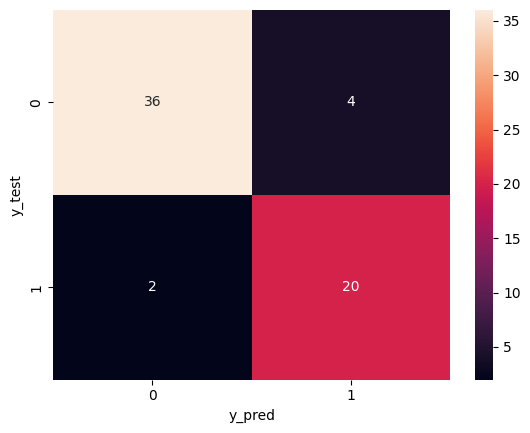

In [24]:
sns.heatmap(spine_crosstab,annot=True);

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.83      0.91      0.87        22

    accuracy                           0.90        62
   macro avg       0.89      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62

